In [1]:
import tensorflow as tf
assert tf.__version__
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import losses

In [3]:
#split the Standford dog dataset into train and test set
#this dataset download from https://www.kaggle.com/carlosmiao/dogbreedidentification based on Stanford Dataset
train_image_dir = 'D:\\Downloads\\train'
test_image_dir = 'D:\\Downloads\\test'

In [4]:
import pandas as pd
labels = pd.read_csv('D:\\Downloads\\labels.csv', index_col = 'id')

In [5]:
labels.head()

,breed
id,
000bec180eb18c7604dcecc8fe0dba07,boston_bull
001513dfcb2ffafc82cccf4d8bbaba97,dingo
001cdf01b096e06d78e9e5112d419397,pekinese
00214f311d5d2247d5dfe4fe24b2303d,bluetick
0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
classes = labels.breed.unique()

In [7]:
#put image with same label in one directory
def create_dir(path):
    if os.path.exists(path) != True:
        os.makedirs(path)

In [8]:
train_path = create_dir("D:\\Downloads\\train_dataset")
test_path = create_dir("D:\\Downloads\\test_dataset")

In [8]:
import shutil
for breed in classes:
    class_path = "D:\\Downloads\\train_dataset\\"+breed
    create_dir(class_path)
    # copy images 
    images = labels[labels.breed == breed].index
    for image in images:
        source = train_image_dir+'\\'+f'{image}.jpg'
        target = class_path+'\\'+f'{image}.jpg'                            
        shutil.copyfile(source,target)

In [9]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip=True,
    validation_split=0.2)

In [11]:
batch_size = 64
height = 299
width = 299
train_dt = generator.flow_from_directory(
    "D:\\Downloads\\train_dataset",
    shuffle = True,
    target_size=(height, width),
    batch_size=batch_size,
    subset="training")

Found 8221 images belonging to 120 classes.


In [12]:
val_dt = generator.flow_from_directory(
    "D:\\Downloads\\train_dataset",
    shuffle = True,
    target_size=(height,width),
    batch_size=batch_size,
    subset="validation"
)

Found 2001 images belonging to 120 classes.


In [13]:
from tensorflow.keras.applications import xception
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import losses

In [26]:
base_xception = xception.Xception(weights='imagenet', include_top=False, input_shape=(height,width,3))
base_inception = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(height,width,3))

In [27]:
base_xception.trainable = False
base_inception.trainable = False

In [28]:
base_xception_model = Sequential([
    base_xception,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.7),
    layers.Dense(120, activation='softmax'),
])

In [29]:
base_inception_model = Sequential([
    base_inception,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.7),
    layers.Dense(120, activation='softmax'),
])

In [30]:
epochs = 20

In [31]:
base_xception_model.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

In [32]:
base_inception_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)

In [34]:
history_xception = base_xception_model.fit(
    train_dt,
    validation_data=val_dt,
    epochs=epochs,
    callbacks = [callback],
)

Epoch 1/20
129/129 [==============================] - 1077s 8s/step - loss: 2.2533 - accuracy: 0.6027 - val_loss: 0.7653 - val_accuracy: 0.8636
Epoch 2/20
129/129 [==============================] - 1120s 9s/step - loss: 0.6516 - accuracy: 0.8562 - val_loss: 0.4914 - val_accuracy: 0.8886
Epoch 3/20
129/129 [==============================] - 1121s 9s/step - loss: 0.4781 - accuracy: 0.8750 - val_loss: 0.4370 - val_accuracy: 0.8846
Epoch 4/20
129/129 [==============================] - 1070s 8s/step - loss: 0.4057 - accuracy: 0.8892 - val_loss: 0.3963 - val_accuracy: 0.8831
Epoch 5/20
129/129 [==============================] - 1060s 8s/step - loss: 0.3695 - accuracy: 0.8971 - val_loss: 0.3928 - val_accuracy: 0.8786
Epoch 6/20
129/129 [==============================] - 1061s 8s/step - loss: 0.3419 - accuracy: 0.8965 - val_loss: 0.3690 - val_accuracy: 0.8866
Epoch 7/20
129/129 [==============================] - 1055s 8s/step - loss: 0.3164 - accuracy: 0.9078 - val_loss: 0.3643 - val_accuracy:

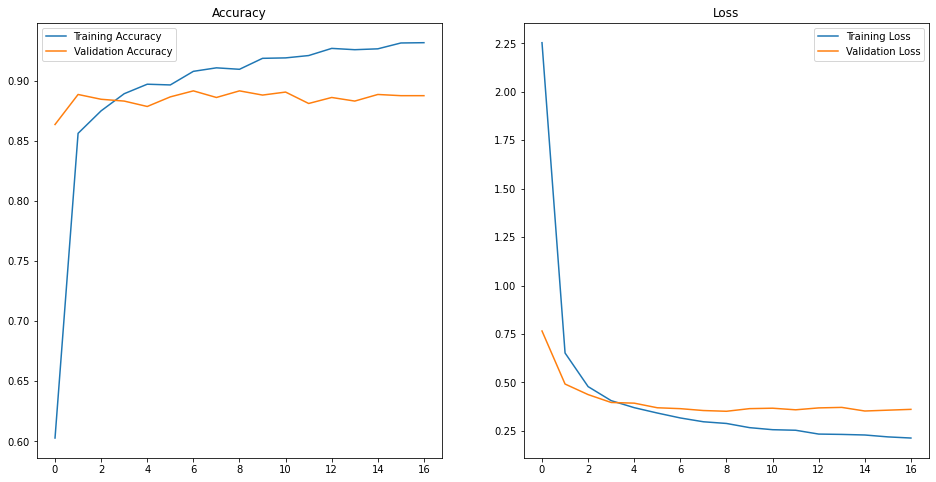

In [36]:
train_acc = history_xception.history['accuracy']
val_acc = history_xception.history['val_accuracy']

train_loss = history_xception.history['loss']
val_loss = history_xception.history['val_loss']

range_epochs = range(17)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(range_epochs, train_acc, label='Training Accuracy')
plt.plot(range_epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range_epochs, train_loss, label='Training Loss')
plt.plot(range_epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [37]:
history_inception_model = base_inception_model.fit(
    train_dt,
    validation_data=val_dt,
    epochs=epochs,
    callbacks = [callback],
)

Epoch 1/20
129/129 [==============================] - 724s 6s/step - loss: 2.3917 - accuracy: 0.5082 - val_loss: 0.7049 - val_accuracy: 0.8541
Epoch 2/20
129/129 [==============================] - 622s 5s/step - loss: 0.7276 - accuracy: 0.8134 - val_loss: 0.4914 - val_accuracy: 0.8626
Epoch 3/20
129/129 [==============================] - 614s 5s/step - loss: 0.5418 - accuracy: 0.8438 - val_loss: 0.4356 - val_accuracy: 0.8661
Epoch 4/20
129/129 [==============================] - 605s 5s/step - loss: 0.4774 - accuracy: 0.8542 - val_loss: 0.3973 - val_accuracy: 0.8731
Epoch 5/20
129/129 [==============================] - 593s 5s/step - loss: 0.4246 - accuracy: 0.8683 - val_loss: 0.4185 - val_accuracy: 0.8741
Epoch 6/20
129/129 [==============================] - 595s 5s/step - loss: 0.3986 - accuracy: 0.8773 - val_loss: 0.3907 - val_accuracy: 0.8696
Epoch 7/20
129/129 [==============================] - 592s 5s/step - loss: 0.3813 - accuracy: 0.8767 - val_loss: 0.4036 - val_accuracy: 0.8786

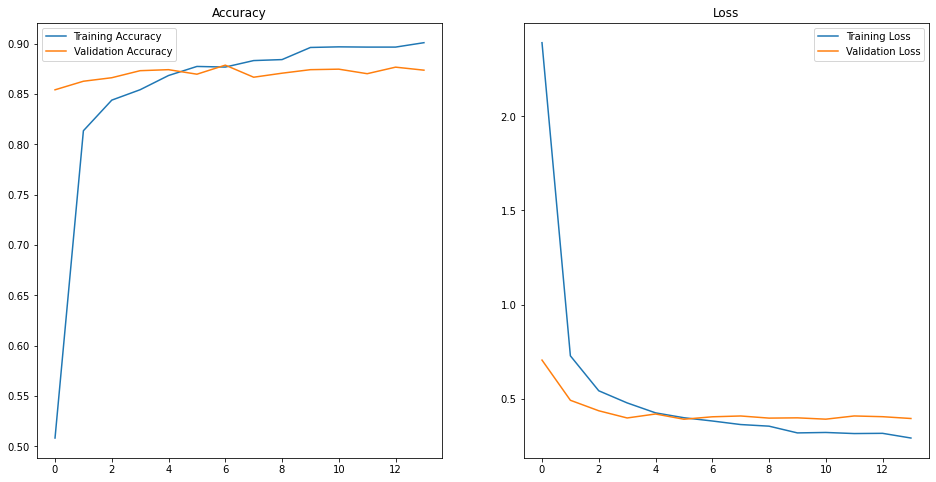

In [38]:
train_acc = history_inception_model.history['accuracy']
val_acc = history_inception_model.history['val_accuracy']

train_loss = history_inception_model.history['loss']
val_loss = history_inception_model.history['val_loss']

range_epochs = range(14)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(range_epochs, train_acc, label='Training Accuracy')
plt.plot(range_epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range_epochs, train_loss, label='Training Loss')
plt.plot(range_epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [40]:
#expor labels.txt
print (train_dt.class_indices)

labels = '\n'.join(sorted(train_dt.class_indices.keys()))

with open('D:\Downloads\labels.txt', 'w') as f:
    f.write(labels)

{'affenpinscher': 0, 'afghan_hound': 1, 'african_hunting_dog': 2, 'airedale': 3, 'american_staffordshire_terrier': 4, 'appenzeller': 5, 'australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'bedlington_terrier': 10, 'bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'border_collie': 16, 'border_terrier': 17, 'borzoi': 18, 'boston_bull': 19, 'bouvier_des_flandres': 20, 'boxer': 21, 'brabancon_griffon': 22, 'briard': 23, 'brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'cardigan': 27, 'chesapeake_bay_retriever': 28, 'chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'curly-coated_retriever': 34, 'dandie_dinmont': 35, 'dhole': 36, 'dingo': 37, 'doberman': 38, 'english_foxhound': 39, 'english_setter': 40, 'english_springer': 41, 'entlebucher': 42, 'eskimo_dog': 43, 'flat-coated_retriever': 44, 'french_bulldog': 45, 'german_shepherd': 46, 'german_short-haired_pointer': 47, 'gian

In [39]:
#choose xception
model_dir = 'D:\Downloads'
tf.saved_model.save(base_xception_model, model_dir)

tfConverter = tf.lite.TFLiteConverter.from_saved_model(model_dir)
tflite_model = tfConverter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: D:\Downloads\assets
